# Clustering de documents

## Imports

In [5]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [6]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\CATHY
[nltk_data]     METANGO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
data_path = "../data/txt/"

## Choisir une décennie

In [18]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [19]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [24]:
# Exemple de fichiers
files[5]

'KB_JB838_1960-01-27_01-00006.txt'

In [21]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [22]:
# Nombre de documents
nombre_documents = len(texts)

# Afficher le nombre de documents
print("Nombre de documents:", nombre_documents)



Nombre de documents: 1000


In [14]:
# Exemple de textes
texts[0][:400]

"Commencera demain lundi le 6 janvier Notre vente n’ù, lieu qu'une fois'par'ail, n 9 driétr de commun ètïï§ : ] être confondüè avec ùucune autre mise en vente. 1 Ce n’est pas une vente de soldes ou de marchandises déclassées,. priais bien une tiqüidaUqm ' Irûle de tous nos articles. ' ; iPendant la durée de la vente -toutes nos marchandnëê/sUm aucune* exception : SOfEMîmJi' VELOURS, LAINAGES, DRAPE"

## Vectoriser les documents à l'aide de TF-IDF

In [25]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [26]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [27]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\CATHY METANGO\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [28]:
# Détail de la matrice
tfidf_vectors

<1000x2997 sparse matrix of type '<class 'numpy.float64'>'
	with 591250 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [29]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429822
ecrire        0.290745
agence        0.287284
bilingue      0.195608
importante    0.172357
                ...   
er            0.000000
erreurs       0.000000
esp           0.000000
espagne       0.000000
♦             0.000000
Length: 2997, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [30]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [31]:
tfidf_array = tfidf_vectors.toarray()

In [32]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
# Vecteur du document 1
tfidf_array[85]

array([0.        , 0.02027952, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [36]:
cosine(tfidf_array[0], tfidf_array[85])

0.9449541820748851

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [114]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [115]:
km_model = KMeans(n_clusters=N_CLUSTERS)


### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [116]:
clusters = km_model.fit_predict(tfidf_vectors)

c:\Users\CATHY METANGO\tac\tac_venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [117]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [ ]:
pprint(dict(clustering))

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [143]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [142]:
reduced_vectors.shape

(1000, 2)

In [121]:
# Obtenir les dimensions de reduced_vectors
nombre_documents, nombre_composantes = reduced_vectors.shape

print("Nombre de documents:", nombre_documents)
print("Nombre de composantes principales:", nombre_composantes)

Nombre de documents: 1000
Nombre de composantes principales: 2


In [139]:
reduced_vectors[:1000]

array([[ 0.49940241, -0.43947917],
       [-0.22882534,  0.00137806],
       [-0.27935516, -0.01591006],
       ...,
       [-0.28531668, -0.10345972],
       [-0.29725433, -0.08593992],
       [ 0.48479734, -0.40864569]])

### Générer le plot

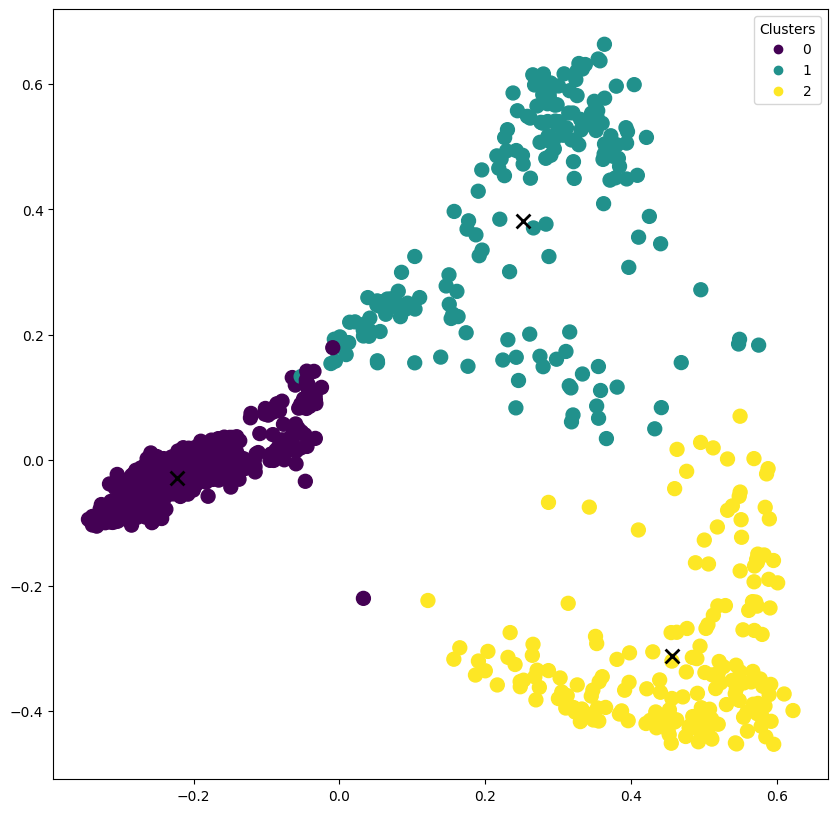

In [138]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]


plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

#ANALYSE avec Nuage de mots et mots clés

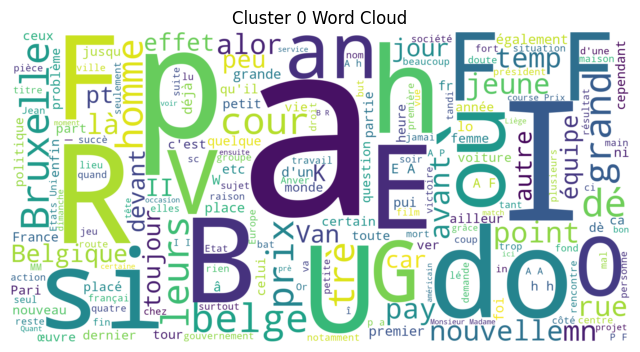

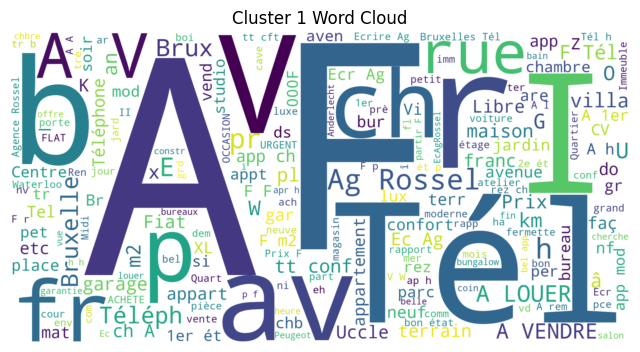

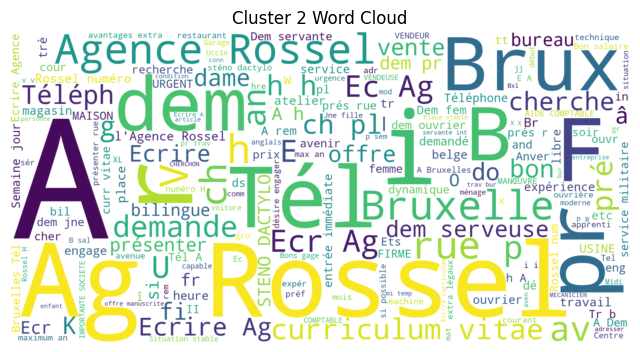

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Supposons que vous avez déjà défini N_CLUSTERS, km_model, tfidf_vectors, et reduced_vectors
# Définir la liste de stopwords
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       ]
sw = set(sw)

# Créer un dictionnaire pour stocker les textes dans chaque cluster
cluster_texts = {cluster: [] for cluster in range(N_CLUSTERS)}

# Ajouter les textes dans chaque cluster
for idx, label in enumerate(clusters):
    cluster_texts[label].append(texts[idx])

# Créer et afficher le nuage de mots pour chaque cluster
for cluster_label, cluster_text in cluster_texts.items():
    # Concaténer les textes dans le cluster en une seule chaîne
    cluster_text_combined = " ".join(cluster_text)

    # Éliminer les stopwords de la chaîne de texte
    cluster_text_combined = ' '.join([word for word in cluster_text_combined.split() if word.lower() not in sw])
   
    # Créer le nuage de mots avec les stopwords filtrés
    wordcloud = WordCloud(width=2000, height=1000, background_color="white", stopwords=sw).generate(cluster_text_combined)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Cluster {cluster_label} Word Cloud")
    plt.axis("off")
    plt.show()


#liste des mot clés

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.corpus import stopwords

# Utilisez les variables déjà définies : tfidf_vectors, clusters, N_CLUSTERS, vectorizer

# Obtenez les noms des caractéristiques (mots) du vectoriseur TF-IDF
feature_names = vectorizer.get_feature_names_out()

# Définissez vos stopwords personnalisés en plus des stopwords français
custom_stopwords = set(stopwords.words('french')) | {"1/2", "mn", "les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",}  # Ajoutez ici les termes supplémentaires à exclure

# Calculer la moyenne des vecteurs TF-IDF pour chaque cluster
cluster_mean = []
for i in range(N_CLUSTERS):
    cluster_docs = tfidf_vectors[np.where(clusters == i)]
    cluster_mean.append(np.mean(cluster_docs, axis=0))

# Extraire et filtrer les mots-clés pour chaque cluster
for i in range(N_CLUSTERS):
    # Convertir la moyenne du cluster en un tableau unidimensionnel
    mean_array = np.asarray(cluster_mean[i]).flatten()

    # Trier les indices en fonction de la valeur TF-IDF
    sorted_indices = np.argsort(mean_array)[::-1]

    # Filtrer les mots-clés en excluant les stopwords
    keywords = [feature_names[idx] for idx in sorted_indices if feature_names[idx] not in custom_stopwords][:20]  # Top 20 mots-clés

    # Convertir les éléments de keywords en chaînes de caractères si nécessaire
    keywords = [str(keyword) for keyword in keywords]

    # Enregistrer les mots-clés dans un fichier
    with open(f'keywords_cluster{i+1}.txt', 'w', encoding='utf-8') as file:
        file.write('\n'.join(keywords))
        print(f'Mots-clés du cluster {i+1} enregistrés dans keywords_cluster{i+1}.txt')


Mots-clés du cluster 1 enregistrés dans keywords_cluster1.txt
Mots-clés du cluster 2 enregistrés dans keywords_cluster2.txt
Mots-clés du cluster 3 enregistrés dans keywords_cluster3.txt
